# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.132495e+01     7.196752e+00
 * time: 0.00524592399597168
     1     3.023611e+01     7.010099e+00
 * time: 0.015674114227294922
     2     1.736348e+01     3.821053e+00
 * time: 0.04727005958557129
     3     1.306552e+01     1.697351e+00
 * time: 0.07476210594177246
     4     1.178153e+01     1.796497e+00
 * time: 0.10198497772216797
     5     1.079279e+01     1.081896e+00
 * time: 0.12442612648010254
     6     1.013200e+01     9.151646e-01
 * time: 0.14585399627685547
     7     9.737553e+00     6.719641e-01
 * time: 0.16873407363891602
     8     9.520842e+00     5.636910e-01
 * time: 0.19051313400268555
     9     9.361437e+00     5.279013e-01
 * time: 0.3761429786682129
    10     9.235285e+00     4.392122e-01
 * time: 0.3959670066833496
    11     9.141229e+00     4.047005e-01
 * time: 0.41556811332702637
    12     9.073835e+00     6.030439e-01
 * time: 0.430772066116333
    13     9.037511e+00     4.997960e-01
 * time: 0.

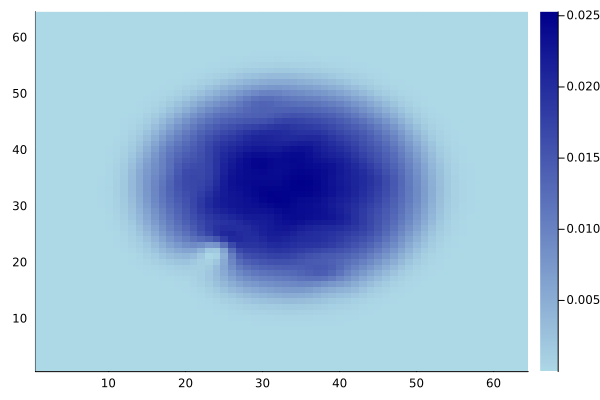

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)